# Background Research

## Predicting Hospital Cost

<img src="Pictures/Hospital.jpg" alt="HOS image" width="450"/>


## Introduction 


The dataset under consideration aims to predict hospital costs in US hospitals by leveraging a range of patient-related information. Attributes include unique patient identifiers (ID), demographic details such as age and gender, as well as health-related indicators like Body Mass Index (BMI). The objective is to build a predictive model that can effectively estimate hospital costs based on these diverse patient factors, offering valuable insights for healthcare management and resource allocation.

### Prediction Task:

#### - Import the dataset and investigate it

In [179]:
import pandas as pd

# importing the dataset
df = pd.read_csv("CA1-Regression-Dataset.csv")

# display summary of dataset
df.info()

# display top 5 rows
df.head()

# display last 5 rows
df.tail


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   Age       1338 non-null   int64  
 2   Gender    1338 non-null   object 
 3   BMI       1338 non-null   float64
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Cost ($)  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<bound method NDFrame.tail of         ID  Age  Gender     BMI Smoker     Region     Cost ($)
0        1   19  female  27.900    yes  southwest  16884.92400
1        2   18    male  33.770     no  southeast   1725.55230
2        3   28    male  33.000     no  southeast   4449.46200
3        4   33    male  22.705     no  northwest  21984.47061
4        5   32    male  28.880     no  northwest   3866.85520
...    ...  ...     ...     ...    ...        ...          ...
1333  1334   50    male  30.970     no  northwest  10600.54830
1334  1335   18  female  31.920     no  northeast   2205.98080
1335  1336   18  female  36.850     no  southeast   1629.83350
1336  1337   21  female  25.800     no  southwest   2007.94500
1337  1338   61  female  29.070    yes  northwest  29141.36030

[1338 rows x 7 columns]>

##### We are given an overview of the dataset

##### How is your prediction task defined? And what is the meaning of the output variable?

##### The prediction task in this context is to estimate or predict the hospital cost based on various patient information provided in the dataset. The output is the predicted hospital cost.

# Exploratory Data Analysis

#### - Discovering the relationship between avrage cost and patient is smoker or not using bar graph<b><h3/>

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


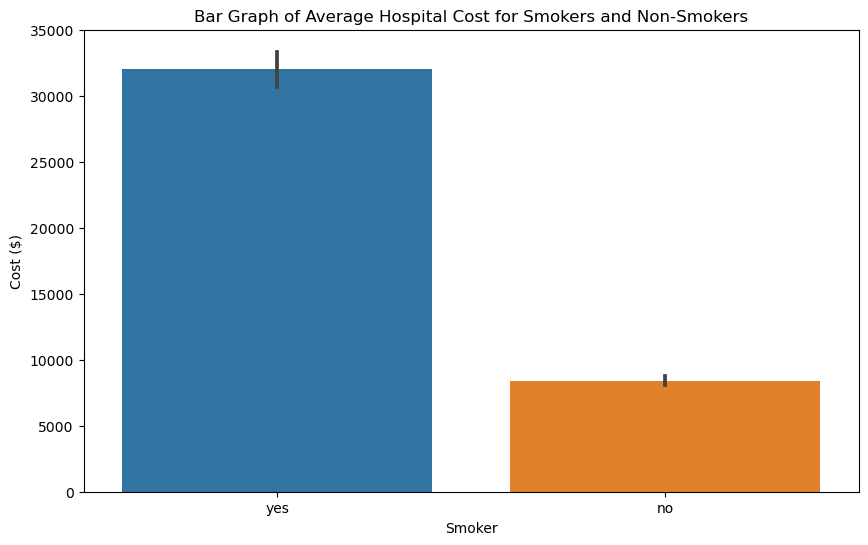

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt


# make a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Smoker', y='Cost ($)', data=df)
plt.title('Bar Graph of Average Hospital Cost for Smokers and Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Cost ($)')
plt.show()


##### As we can see, if the person is a smoker, the average hospital cost is significantly greater than the average of hospital cost for non-smokers

#### - Discovering the relationship between cost and region using pie chart<b><h5/>

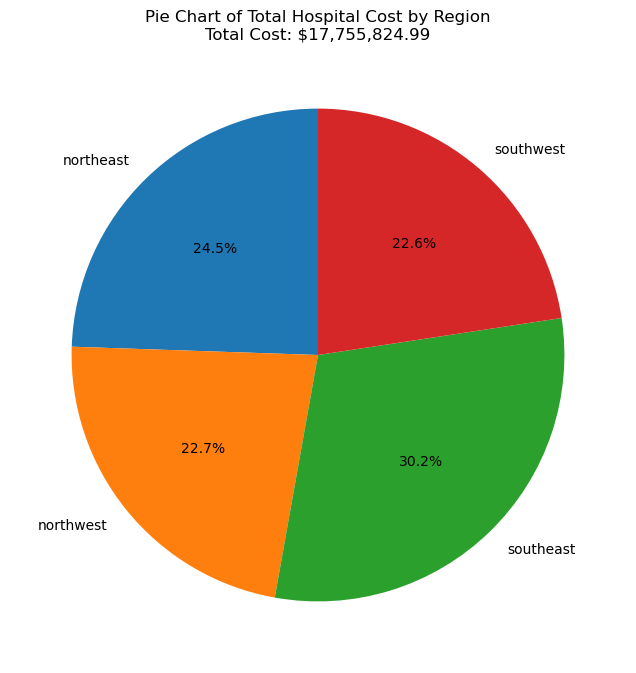

In [181]:
import matplotlib.pyplot as plt


# group the data by 'Region' calculate the total cost for each region
region_costs = df.groupby('Region')['Cost ($)'].sum()

# total cost across all regions
total_cost = region_costs.sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_costs, labels=region_costs.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Pie Chart of Total Hospital Cost by Region\nTotal Cost: ${total_cost:,.2f}')
plt.show()


##### As we can see, a large chunk of the cost comes from patients from the southeast at 30.2% this could indicate a few things like a greater population in the southeast or more affluent people willing to splurge on hospital cost

#### - Discovering the relationship between cost and BMI using scatter plot<b><h5/>

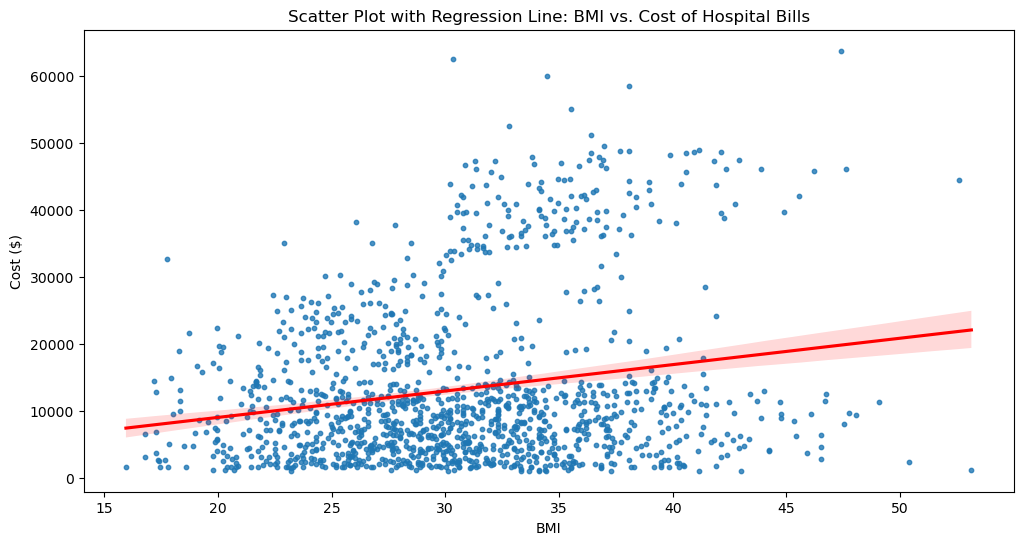

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
plt.figure(figsize=(12, 6))
sns.regplot(x='BMI', y='Cost ($)', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Scatter Plot with Regression Line: BMI vs. Cost of Hospital Bills')
plt.xlabel('BMI')
plt.ylabel('Cost ($)')
plt.show()


##### As we can see, that as BMI increases, the cost increase as shown by the increasing red regression line

# Feature Engineering

### Feature Processing:

##### - Dealing With Missing Values

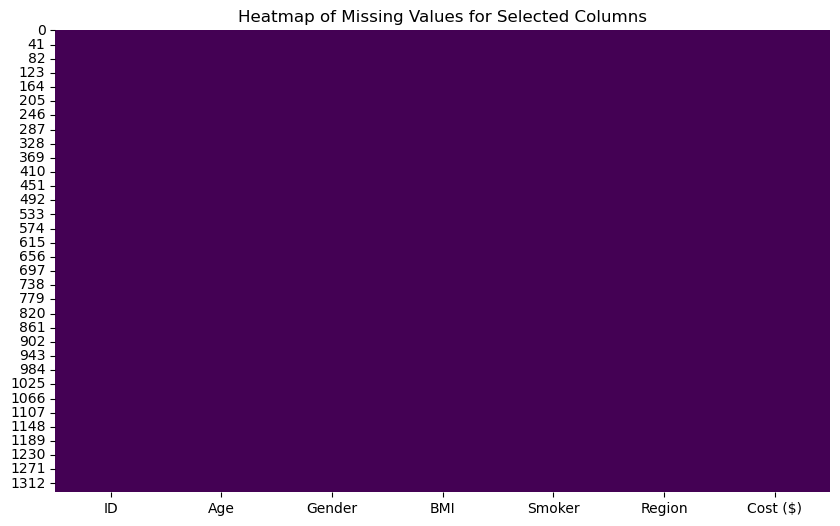

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

# put in the columns
columns = ['ID', 'Age', 'Gender', 'BMI', 'Smoker', 'Region', 'Cost ($)']

# make a subset DataFrame with columns
subset_df = df[columns]

# heatmap for missing values
plt.figure(figsize=(10, 6))
sns.heatmap(subset_df.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap of Missing Values for Selected Columns')
plt.show()


##### As we can see, there are no missing values in this dataset

In [184]:
df.isnull().sum()

ID          0
Age         0
Gender      0
BMI         0
Smoker      0
Region      0
Cost ($)    0
dtype: int64

##### All slots are filled there are no missing values in all columns hence we can skip imputing

### Label Encoding:

In [185]:
df.head()

,ID,Age,Gender,BMI,Smoker,Region,Cost ($)
0,1,19,female,27.900,yes,southwest,16884.92400
1,2,18,male,33.770,no,southeast,1725.55230
2,3,28,male,33.000,no,southeast,4449.46200
3,4,33,male,22.705,no,northwest,21984.47061
4,5,32,male,28.880,no,northwest,3866.85520


##### As we can see there are strings. Label encoding simplifies categorical data by assigning a unique number to each category, making it suitable for machine learning algorithms that require numerical input

##### first we can change the smoker column when the person is a smoker we put a 1 and if not a 0

In [186]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Smoker'] = le.fit_transform(df['Smoker'])


In [187]:
df.head()

,ID,Age,Gender,BMI,Smoker,Region,Cost ($)
0,1,19,female,27.900,1,southwest,16884.92400
1,2,18,male,33.770,0,southeast,1725.55230
2,3,28,male,33.000,0,southeast,4449.46200
3,4,33,male,22.705,0,northwest,21984.47061
4,5,32,male,28.880,0,northwest,3866.85520


##### nicee ok now we do the gender column if person is a female we record it as 0 and if male we record as 1

In [188]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


In [189]:
df.head()

,ID,Age,Gender,BMI,Smoker,Region,Cost ($)
0,1,19,0,27.900,1,southwest,16884.92400
1,2,18,1,33.770,0,southeast,1725.55230
2,3,28,1,33.000,0,southeast,4449.46200
3,4,33,1,22.705,0,northwest,21984.47061
4,5,32,1,28.880,0,northwest,3866.85520


### One-Hot Encoding:

##### ok as for region but first we find out how many regions there are ill use the pie chart from above

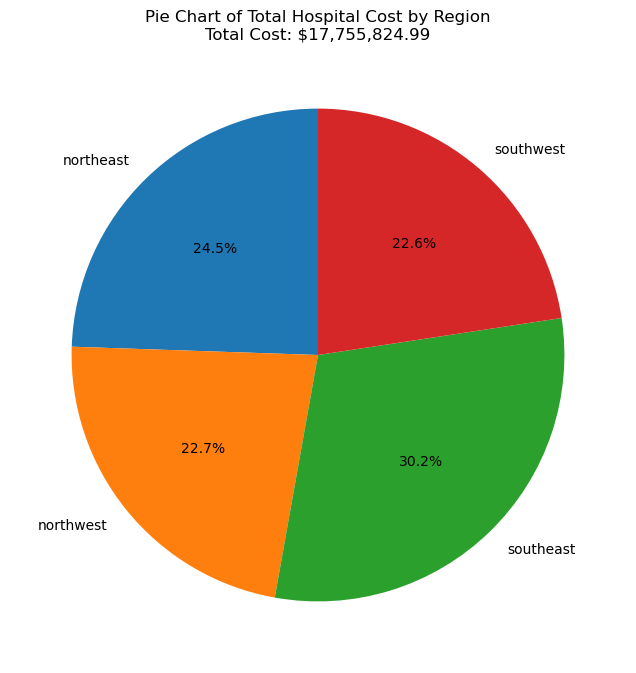

In [190]:
import matplotlib.pyplot as plt


region_costs = df.groupby('Region')['Cost ($)'].sum()

total_cost = region_costs.sum()

plt.figure(figsize=(8, 8))
plt.pie(region_costs, labels=region_costs.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Pie Chart of Total Hospital Cost by Region\nTotal Cost: ${total_cost:,.2f}')
plt.show()

##### ok there is 4 northwest, southeast, northeast and southwest

##### ok using this data what i will do is create 4 columns each for the 4 different regions 

#### for that we goona use pd.get_dummies so how this function works is that it is a function that converts categorical variables into a binary matrix representation

In [191]:
region = pd.get_dummies(df["Region"])
# cuz it will be true false so change it to 1 and 0
region = region.astype(int)
region.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


##### nicee so now we gotta add it to the df

In [192]:
# add it to df
df = pd.concat([df, region], axis=1)
df.head()

,ID,Age,Gender,BMI,Smoker,Region,Cost ($),northeast,northwest,southeast,southwest
0,1,19,0,27.900,1,southwest,16884.92400,0,0,0,1
1,2,18,1,33.770,0,southeast,1725.55230,0,0,1,0
2,3,28,1,33.000,0,southeast,4449.46200,0,0,1,0
3,4,33,1,22.705,0,northwest,21984.47061,0,1,0,0
4,5,32,1,28.880,0,northwest,3866.85520,0,1,0,0


since theres no need for the region column now we drop it

In [193]:
df = df.drop("Region", axis=1)
df.head()

,ID,Age,Gender,BMI,Smoker,Cost ($),northeast,northwest,southeast,southwest
0,1,19,0,27.900,1,16884.92400,0,0,0,1
1,2,18,1,33.770,0,1725.55230,0,0,1,0
2,3,28,1,33.000,0,4449.46200,0,0,1,0
3,4,33,1,22.705,0,21984.47061,0,1,0,0
4,5,32,1,28.880,0,3866.85520,0,1,0,0


### Rename:

##### lastly for this section i want to rename 'Cost ($)' to 'Cost'

In [194]:
df=df.rename(columns={"Cost ($)":"Cost"})
df.head()

,ID,Age,Gender,BMI,Smoker,Cost,northeast,northwest,southeast,southwest
0,1,19,0,27.900,1,16884.92400,0,0,0,1
1,2,18,1,33.770,0,1725.55230,0,0,1,0
2,3,28,1,33.000,0,4449.46200,0,0,1,0
3,4,33,1,22.705,0,21984.47061,0,1,0,0
4,5,32,1,28.880,0,3866.85520,0,1,0,0


### Stupid Baseline:

#### create instance of stupid dummy baseline

In [195]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(['Cost'], axis=1)
y = df['Cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# dummy Regressor
dummy_regressor = DummyRegressor(strategy='mean')

# fit the dummy regressor
dummy_regressor.fit(X_train, y_train)

# predict
y_pred_dummy = dummy_regressor.predict(X_test)

# evaluate the performance
mse_dummy = mean_squared_error(y_test, y_pred_dummy)
r2_dummy = r2_score(y_test, y_pred_dummy)

print(f"Mean Squared Error (Dummy): {mse_dummy:.4f}")
print(f"R-squared (Dummy): {r2_dummy:.4f}")


Mean Squared Error (Dummy): 155391443.6846
R-squared (Dummy): -0.0009


##### comparing different models variance in the target (Cost)

Linear Regression
R^2: 0.7651288960596152
Root Mean Squared Error: 5868.373970665833
Gradient Boosting Regressor
R^2: 0.853013539493035
Root Mean Squared Error: 4642.390337061398
Random Forest Regressor


R^2: 0.8397357253254831
Root Mean Squared Error: 4847.539412351916
Bayesian Ridge
R^2: -0.001678975824232376
Root Mean Squared Error: 12119.013431889789
Decision Tree Regressor
R^2: 0.659322489955681
Root Mean Squared Error: 7067.644878270446
Elastic Net
R^2: 0.39736717629035434
Root Mean Squared Error: 9400.033015405303
KNN_Regressor
R^2: 0.004796945052288115
Root Mean Squared Error: 12079.774796983103


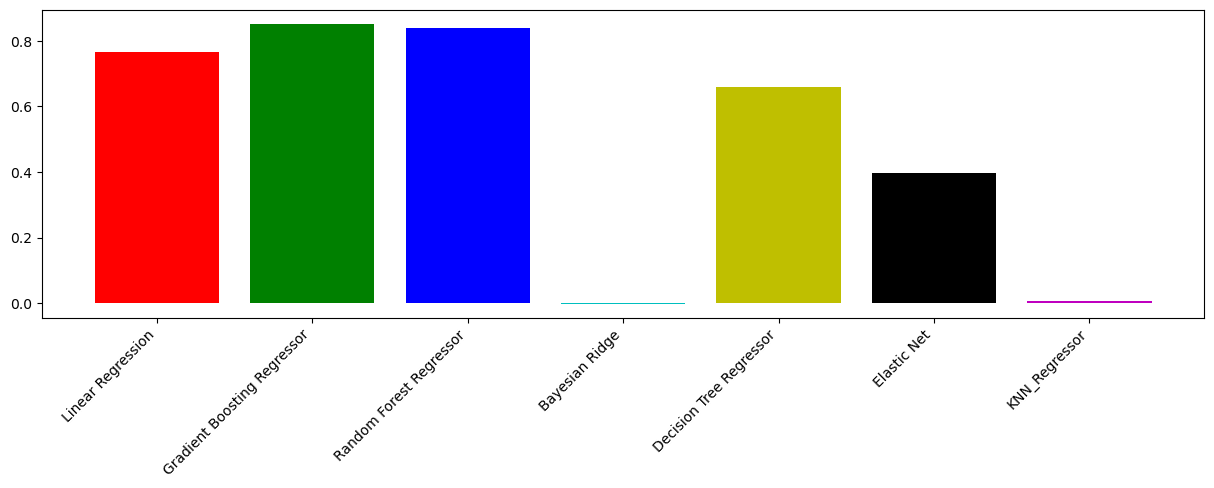

In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# set my targets and features, Target: Cost
X= df.drop(['Cost'],axis=1)
y= df['Cost']

# training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# models ill be testin out
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'Bayesian Ridge' : linear_model.BayesianRidge(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'Elastic Net':ElasticNet(),
    'KNN_Regressor':KNeighborsRegressor()
}

accuracy=[]
for name in models:
    print(name)
    # regressor: model
    model=models[name]
    # fit the regressor to the training data
    model.fit(X_train,y_train)
    # predict test data
    y_pred=model.predict(X_test)
    accuracy.append(model.score(X_test,y_test))
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    print("R^2: {}".format(model.score(X_test, y_test)))
    print("Root Mean Squared Error: {}".format(rmse))

# plot graph
plt.figure(figsize=(15,4))
plt.bar(models.keys(),accuracy,color=['r','g','b','c','y','k','m'])
plt.xticks(rotation=45, ha="right")
plt.show()


### Feature Selection:

##### correlation heatmap to show us correlations in data

<Axes: >

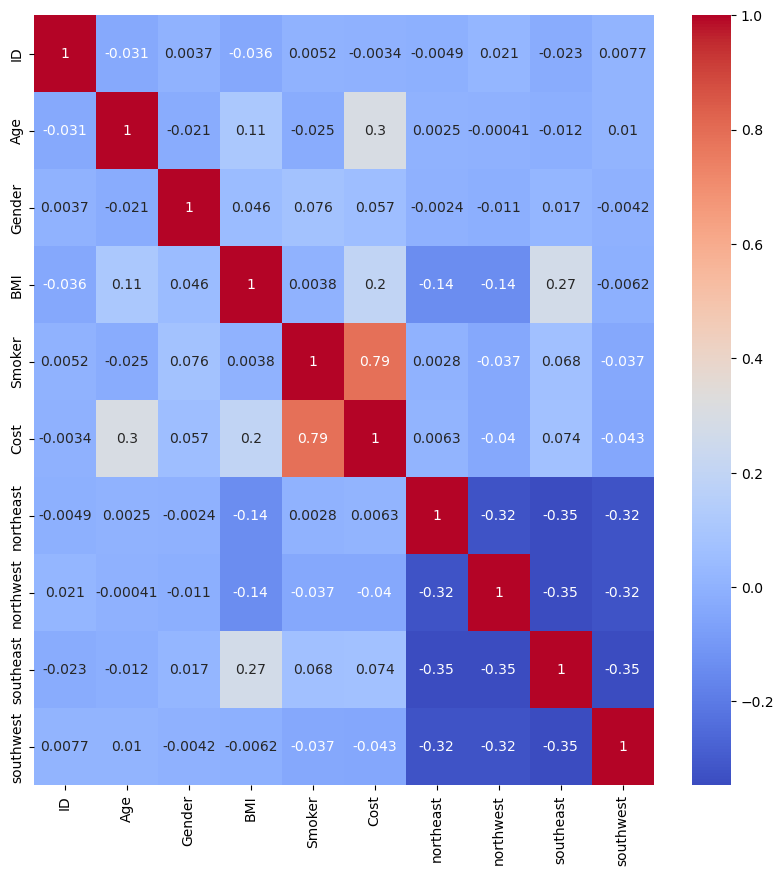

In [197]:
import seaborn as sns

cor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')

##### use RFE with a RandomForestRegressor to identify and select the top 5 important features from the dataset based on their contribution to predicting the target variable 'Cost'

In [198]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
X = df.drop(['Cost'],axis=1)
y= df['Cost']
estimator = RandomForestRegressor()
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_


array([ True,  True,  True,  True,  True, False, False, False, False])

In [199]:
selector.get_feature_names_out()

array(['ID', 'Age', 'Gender', 'BMI', 'Smoker'], dtype=object)

##### aight so these are the top 5 features

##### Multicollinearity can lead to unstable data sets so im going to penalise features that causes it first calculating Variance Inflation Factor so i have an idea

##### vif scores

In [200]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('Cost ~ ID + Age + BMI + Smoker + northwest', data=df, return_type='dataframe')

# calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

vif


,VIF,variable
0,37.078592,Intercept
1,1.002383,ID
2,1.013723,Age
3,1.032332,BMI
4,1.002026,Smoker
5,1.020704,northwest


##### VIF Explanation
The Variance Inflation Factor (VIF) is a measure that quantifies the severity of multicollinearity in a regression analysis. Multicollinearity occurs when independent variables in a regression model are highly correlated with each other, which can lead to issues in estimating the individual coefficients' effects.

- VIF < 5: Moderate correlation. Generally acceptable.
- VIF > 5: High correlation. Considered problematic, and it might indicate multicollinearity.

##### Conclusion for VIF Search 
Generally the features are Moderate Correlated which means we can use them as features and it will not have much problems

##### now we use lasso for feature selection

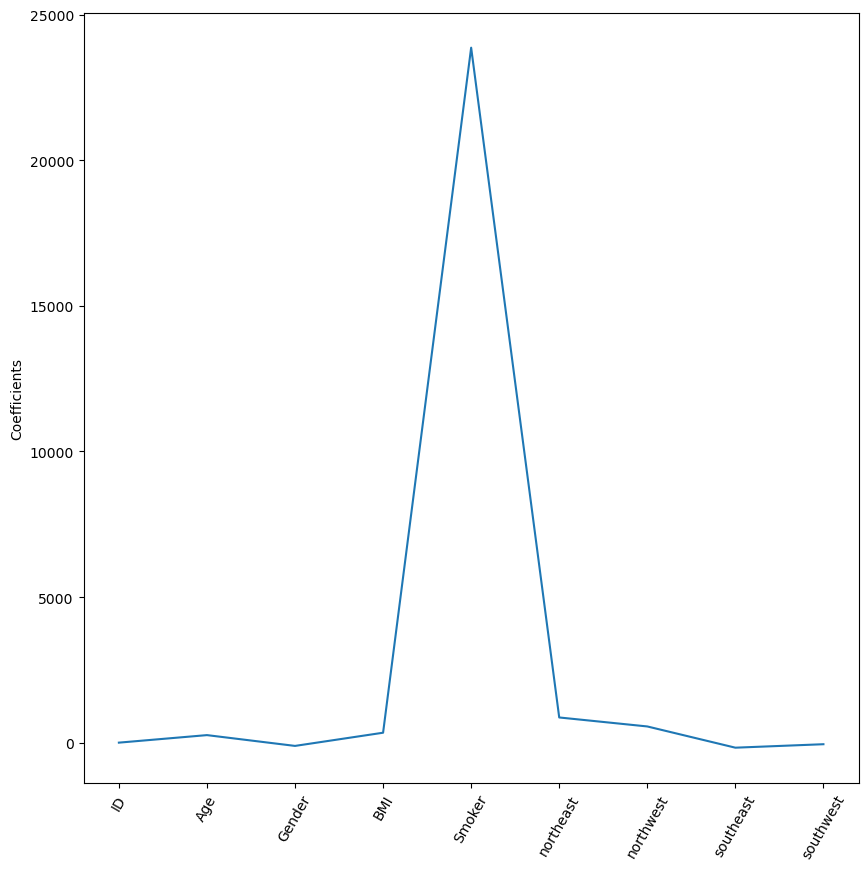

In [68]:
from sklearn.linear_model import Lasso
names = df.drop(['Cost'],axis=1).columns
X = df.drop(['Cost'],axis=1)
y= df['Cost']
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_
plt.figure(figsize=(10, 10))
_ =plt.plot(range(len(names)),lasso_coef)
_ =plt.xticks(range(len(names)),names,rotation=60)
_ =plt.ylabel('Coefficients')
plt.show()

##### Did you process the features in any way?

##### i did a few thing to process the data first i checked for missing data when thats done, i encoded the data using two tpes of encoding label and one-hot encoding. i used label encoding to change data into norminal data for example for female and male i encoded in such that if female = 0 and male = 1 this way the model would be more efficient. As for one-hot encoding, i added 4 colums northwest, southeast, northeast and southwest using pd.get_dummies which coverts categorical variables into a binary matrix representaion this would also help with the efficientcy of the model. I also used random forest regressor to select top 5 features in the dataset based on their contribution to predicting target variable, calculated their variance inflation factor to see if there would be multicollinearity and if it was high penalise the features weight using lasso . info VIF > 5: High correlation. Considered problematic, and it might indicate multicollinearity.

# Choosing Best Model

scaledGBR: R2 Mean=0.8542321199091185, R2 Std=0.03434389932754263, MSE Mean=-21518821.78014271, MSE Std=6087146.814866826
scaledLR: R2 Mean=0.7441104227714312, R2 Std=0.042562682580702, MSE Mean=-37481264.80493316, MSE Std=6717747.6048299465
scaledBR: R2 Mean=0.7437637899336316, R2 Std=0.04261371562796996, MSE Mean=-37527616.91650728, MSE Std=6701724.842472204
scaledDTR: R2 Mean=0.6878819572298467, R2 Std=0.04723916686676282, MSE Mean=-48886760.53177686, MSE Std=10293973.032504294
scaledEN: R2 Mean=0.6631007408663553, R2 Std=0.026485783478581673, MSE Mean=-49743999.37480005, MSE Std=8396287.85107367
scaledKNNR: R2 Mean=0.7703223852921398, R2 Std=0.032670934962412905, MSE Mean=-33729930.852501675, MSE Std=5645640.175894497


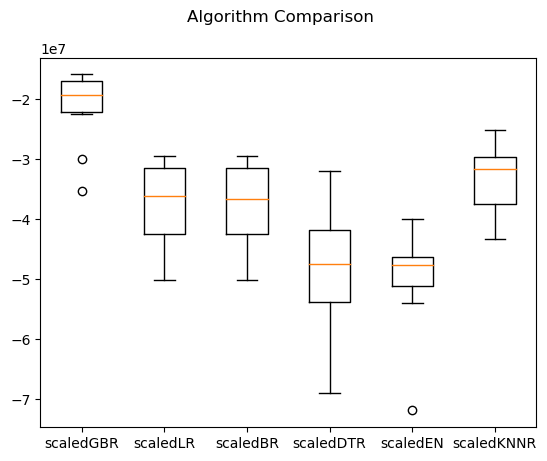

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

X = df.drop(['Cost'],axis=1)
y= df['Cost']

pipelines = []
pipelines.append(('scaledGBR' , (Pipeline([('scaled' , StandardScaler()),('Gradient Boosting Regressor',GradientBoostingRegressor())]))))
pipelines.append(('scaledLR' , (Pipeline([('scaled' , StandardScaler()),('Linear Regression', LinearRegression())]))))
pipelines.append(('scaledBR' , (Pipeline([('scaled' , StandardScaler()),('Bayesian Ridge' , linear_model.BayesianRidge())]))))
pipelines.append(('scaledDTR' , (Pipeline([('scaled' , StandardScaler()),('Decision Tree Regressor',DecisionTreeRegressor())]))))
pipelines.append(('scaledEN' , (Pipeline([('scaled' , StandardScaler()),('Elastic Net',ElasticNet())]))))
pipelines.append(('scaledKNNR' , (Pipeline([('scaled' , StandardScaler()),('KNN_Regressor',KNeighborsRegressor())]))))


# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21)


model_name = []
results = []
r2_results=[]
for pipe ,model in pipelines:
    kfold = KFold(n_splits=10)
    r2_crossv_results = cross_val_score(model , X_train ,y_train ,cv =kfold , scoring='r2') 
    crossv_results = cross_val_score(model , X_train ,y_train ,cv =kfold , scoring='neg_mean_squared_error')
    results.append(crossv_results)
    r2_results.append(r2_crossv_results)
    model_name.append(pipe)
    msg = f"{pipe}: R2 Mean={r2_crossv_results.mean()}, R2 Std={r2_crossv_results.std()}, MSE Mean={crossv_results.mean()}, MSE Std={crossv_results.std()}"
    print(msg)
    
# Compare different Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_name)
plt.show()

Gradient Boosting Regressor has the highest R2 Mean: 0.8542, indicating that it explains a larger proportion of the variance in the target variable. Additionally, it has the lowest MSE Mean, suggesting that its predictions have the smallest average squared differences from the actual values. So i will be picking Gradient Boosting Regressor as my model.

##### How did you select which learning algorithms to use?

##### This was done by first, creating a pipeline which runs through using a for loop to calculate R2 mean, MSE Mean and for the model that has the highest R2 mean and the lowest MSE mean would be the most approprate model to be used for the predictions and since it was gradient boosting regressor i chose it to be my model.

# Model Improvement

### finding best and Tuning hyperparameters:

##### learning curve to show how tuning affects model

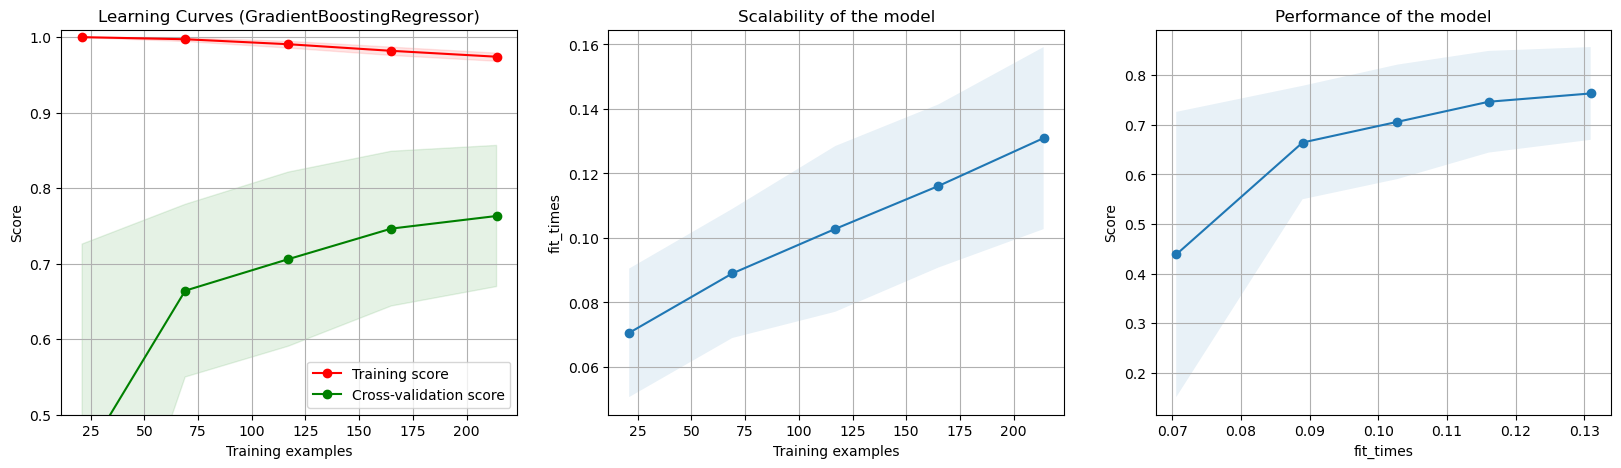

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
   
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(1, 3, figsize=(20, 5))

title = r"Learning Curves (GradientBoostingRegressor)"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = GradientBoostingRegressor()
plot_learning_curve(
    estimator, title, X_test, y_test, axes=axes, ylim=(0.5, 1.01), cv=cv, n_jobs=4
)

plt.show()


#### Bias and Variance analysis

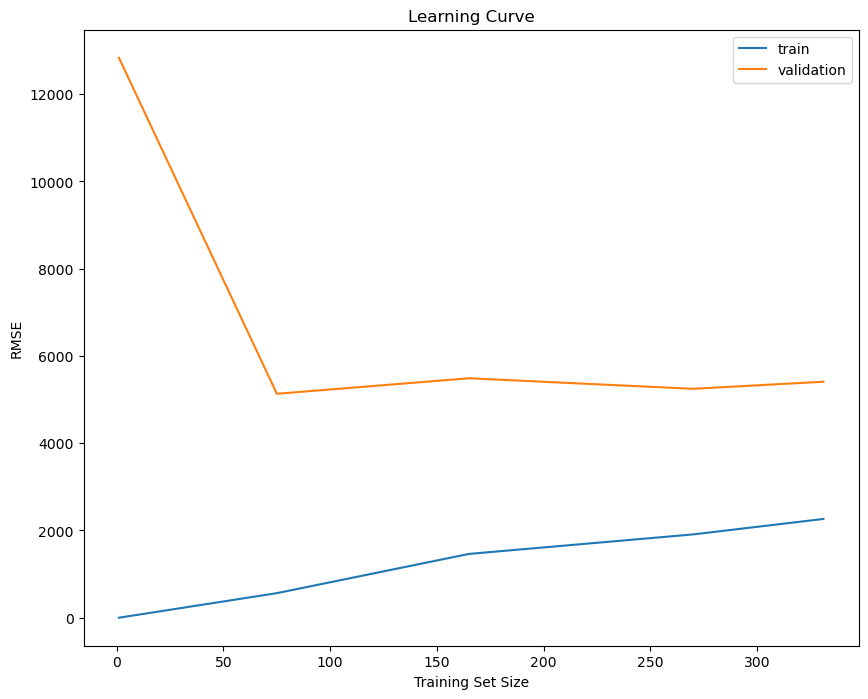

In [91]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# overfitting
gb = GradientBoostingRegressor()

train_sizes, train_scores, test_scores = learning_curve(
    estimator=gb,
    X=X,
    y=y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = [1, 75, 165, 270, 331]
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()

##### The validation RMSE decreased, showing improved generalization to new data, while the training RMSE slightly increased, indicating a potential risk of overfitting to the training set.

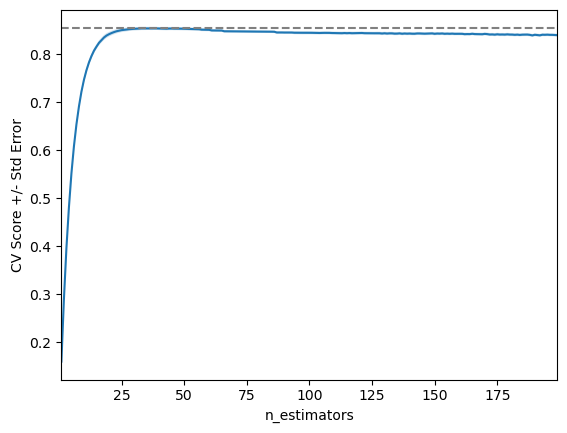

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(depth_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(depth_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('n_estimators')  # Change the label based on the hyperparameter you are tuning
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([depth_space[0], depth_space[-1]])
    ax.set_xscale('linear')
    plt.show()

# setup the array of hyperparameter values and lists to store scores
depth_space = np.arange(1, 200)
gb_scores = []
gb_scores_std = []

# make Gradient Boosting Regressor
GBR = GradientBoostingRegressor()

# compute scores over range of hyperparameter values
for depth in depth_space:
    # specify the hyperparameter value to use: n_estimators
    GBR.n_estimators = depth
    
    # perform 3-fold CV: gb_cv_scores
    gb_cv_scores = cross_val_score(GBR, X, y, cv=3, scoring='r2')
    
    # append the mean of gb_cv_scores to gb_scores
    gb_scores.append(np.mean(gb_cv_scores))
    
    # append the std of gb_cv_scores to gb_scores_std
    gb_scores_std.append(np.std(gb_cv_scores))

display_plot(gb_scores, gb_scores_std)


##### as we can see that it peaks between n_estimators 30-45 we can run gridsearch cv to find best for other parameters as well

In [101]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression

X = df.drop(['Cost'], axis=1)
y = df['Cost']

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 3, 5, 7],
    'min_samples_leaf': [1, 2, 3, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

# GridSearchCV
grid_search = GridSearchCV(gb_regressor, param_grid, cv=3, scoring='r2', n_jobs=-1)

# fit model to the data
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)



Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50, 'subsample': 0.9}


In [120]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=50, subsample=0.9)

# fit the model to the training data
best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)

# calculate R-squared score
r_squared = r2_score(y_test, y_pred)

# print the final R-squared score
print(f"Final R-squared Score: {r_squared:.4f}")


Final R-squared Score: 0.8704


##### lets see the improvements in a learning curve

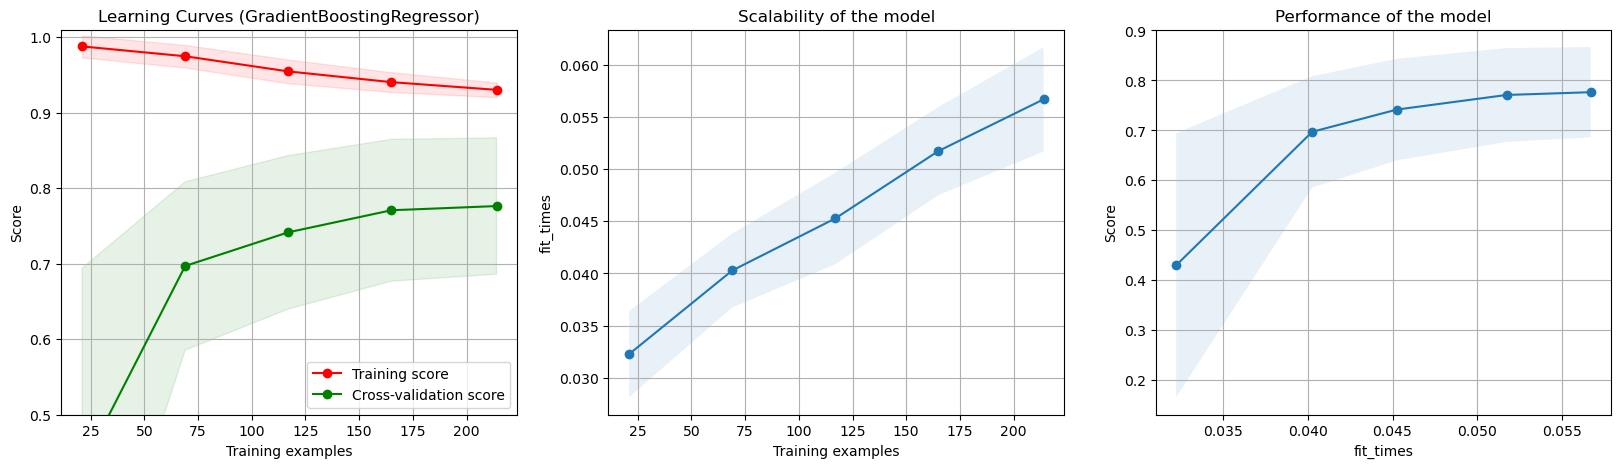

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
   
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(1, 3, figsize=(20, 5))

title = r"Learning Curves (GradientBoostingRegressor)"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = best_model
plot_learning_curve(
    estimator, title, X_test, y_test, axes=axes, ylim=(0.5, 1.01), cv=cv, n_jobs=4
)

plt.show()


##### Did you try to tune the hyperparameters of the learning algorithm, and in that case how?

##### i used GridSearchCV as it is used to systematically search for the best combination of hyperparameter values for a given model

##### How do you evaluate the quality of your system?

#### there is a function that evaluates the quality of a GradientBoostingRegressor using learning curves, which plot training and cross-validation scores against the training set size. The first subplot shows the training and cross-validation scores, aiding in identifying overfitting or underfitting. The second subplot assesses the scalability of the model by plotting fit times against the training set size. The last subplot shows the relationship between fit times and cross-validation scores, offering insights into the model's performance trade-offs. Through these visualizations, the function provides a comprehensive analysis of my system's behavior, hence evaluating my systems performance.

### Stacking:

##### meta model gridsearchcv

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

linear_regression = LinearRegression()

# hyperparameter grid to search
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, 1, 2, 4],
    'positive': [False, True],
}

# GridSearchCV
grid_search = GridSearchCV(linear_regression, param_grid, cv=5, scoring='r2', n_jobs=-1)

# fit the model to the data
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)


Best Parameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}


In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X = df.drop(['Cost'],axis=1)
y= df['Cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_regressor = KNeighborsRegressor()

# hyperparameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

# GridSearchCV
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='r2', n_jobs=-1)

# fit the model to the data
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)



Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [-0.11340908 -0.11904424 -0.19623774 -0.19669915 -0.01789396 -0.01173143
 -0.07991922 -0.07638228  0.01411145  0.02696154 -0.03302303 -0.02504082
 -0.11340908 -0.11904424 -0.19623774 -0.19669915 -0.01798707 -0.01181555
 -0.07991922 -0.07638228  0.01411145  0.02696154 -0.03302303 -0.02504082
 -0.11340908 -0.11904424 -0.19623774 -0.19669915 -0.01789396 -0.01173143
 -0.07991922 -0.07638228  0.01411145  0.02696154 -0.03302303 -0.02504082
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan]
  warnings.warn(


In [119]:
meta_model = LinearRegression(copy_X= True, fit_intercept= True, n_jobs= None, positive= True)

In [171]:
from sklearn.metrics import r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# define base models
base_models = [
    ('gb', best_model),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(algorithm= 'auto', n_neighbors= 7, p= 1, weights= 'distance'))),
]

# stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# fit the stacking regressor
stacking_regressor.fit(X_train, y_train)

# make predictions
y_pred = stacking_regressor.predict(X_test)

# calculate r-squared score also mse
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Final R-squared Score: {r_squared:.4f}")
print(f"Mean Squared Error: {mse:.4f}")




Final R-squared Score: 0.8721
Mean Squared Error: 19857075.8589


#### compare with stupid dummy baseline

In [178]:
print(f"R-squared Stupid Dummy Baseline: {r2_dummy:.4f}")
print(f"Mean Squared Error Stupid Dummy Baseline: {mse_dummy:.4f}")
print(f"Final R-squared of my Model: {r_squared:.4f}")
print(f"Mean Squared Error of my model: {mse:.4f}")
print(f"My model mse is lower than the dummy by {mse_dummy-mse}")
print(f"my models R-squared is higher than the model by {r_squared-r2_dummy}")

R-squared Stupid Dummy Baseline: -0.0009
Mean Squared Error Stupid Dummy Baseline: 155391443.6846
Final R-squared of my Model: 0.8721
Mean Squared Error of my model: 19857075.8589
My model mse is lower than the dummy by 135534367.8257202
my models R-squared is higher than the model by 0.8730143333435355


##### How well does your system compare to a dummy baseline?

##### my model outperforms the Stupid Dummy Baseline significantly, as indicated by a higher R-squared value of 0.8721 compared to the baseline's -0.0009. Additionally, the model achieves a substantially lower Mean Squared Error (MSE) of 19857075.8589, showcasing its improved predictive accuracy compared to the baseline's MSE of 155391443.6846. The considerable margin by which the model surpasses the baseline in both R-squared and MSE underscores its effectiveness in capturing and predicting patterns in the data.







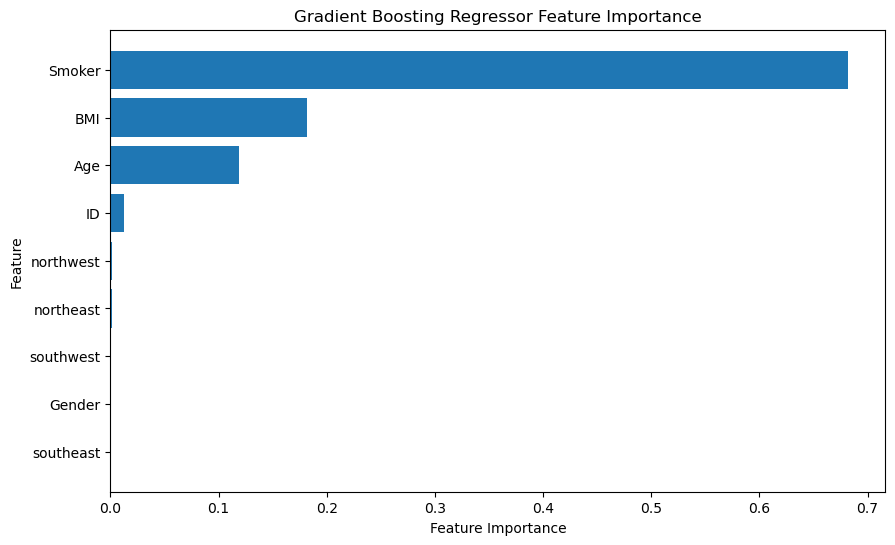

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

feature_importance = best_model.feature_importances_
feature_names = ['ID', 'Age', 'Gender', 'BMI', 'Smoker', 'northeast', 'northwest', 'southeast', 'southwest']

# sort the features based on their importance
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Gradient Boosting Regressor Feature Importance")
plt.show()


##### Is it possible to say something about which features the model considers important? (Whether this is possible depends on the type of classifier you are using)

##### As seen in the graph above the model ranked Smoker as the top contributer at feature importance close to 0.7 hence means considers this feature as important